In [28]:
import pandas as pd
import numpy as np

weather = pd.read_csv("SF_Weather.csv", index_col="DATE")


In [29]:
weather


STATION                                        NAME  ACMH   
DATE                                                                        
1960-01-01  USW00023188      SAN DIEGO INTERNATIONAL AIRPORT, CA US   NaN  \
1960-01-02  USW00023188      SAN DIEGO INTERNATIONAL AIRPORT, CA US   NaN   
1960-01-03  USW00023188      SAN DIEGO INTERNATIONAL AIRPORT, CA US   NaN   
1960-01-04  USW00023188      SAN DIEGO INTERNATIONAL AIRPORT, CA US   NaN   
1960-01-05  USW00023188      SAN DIEGO INTERNATIONAL AIRPORT, CA US   NaN   
...                 ...                                         ...   ...   
2023-04-18  USW00023234  SAN FRANCISCO INTERNATIONAL AIRPORT, CA US   NaN   
2023-04-19  USW00023234  SAN FRANCISCO INTERNATIONAL AIRPORT, CA US   NaN   
2023-04-20  USW00023234  SAN FRANCISCO INTERNATIONAL AIRPORT, CA US   NaN   
2023-04-21  USW00023234  SAN FRANCISCO INTERNATIONAL AIRPORT, CA US   NaN   
2023-04-22  USW00023234  SAN FRANCISCO INTERNATIONAL AIRPORT, CA US   NaN   

            ACSH   AWND  FMTM  FRGT  PGTM  PRCP  PSUN  ...  WT11  WT13  WT14   
DATE                                                   ...                     
1960-01-01   NaN    NaN   NaN   NaN   NaN  0.03   NaN  ...   NaN   NaN   NaN  \
1960-01-02   NaN    NaN   NaN   NaN   NaN  0.00   NaN  ...   NaN   NaN   NaN   
1960-01-03   NaN    NaN   NaN   NaN   NaN  0.00   NaN  ...   NaN   NaN   NaN   
1960-01-04   NaN    NaN   NaN   NaN   NaN  0.00   NaN  ...   NaN   NaN   NaN   
1960-01-05   NaN    NaN   NaN   NaN   NaN  0.00   NaN  ...   NaN   NaN   NaN   
...          ...    ...   ...   ...   ...   ...   ...  ...   ...   ...   ...   
2023-04-18   NaN  10.29   NaN   NaN   NaN  0.00   NaN  ...   NaN   NaN   NaN   
2023-04-19   NaN  14.09   NaN   NaN   NaN  0.00   NaN  ...   NaN   NaN   NaN   
2023-04-20   NaN  11.63   NaN   NaN   NaN  0.00   NaN  ...   NaN   NaN   NaN   
2023-04-21   NaN  11.18   NaN   NaN   NaN  0.00   NaN  ...   NaN   NaN   NaN   
2023-04-22   NaN    NaN   NaN   NaN   NaN   NaN   NaN  ...   NaN   NaN   NaN   

            WT16  WT18  WT21  WT22  WV01  WV03  WV20  
DATE                                                  
1960-01-01   1.0   NaN   NaN   NaN   NaN   NaN   NaN  
1960-01-02   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
1960-01-03   1.0   NaN   NaN   NaN   NaN   NaN   NaN  
1960-01-04   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
1960-01-05   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
...          ...   ...   ...   ...   ...   ...   ...  
2023-04-18   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
2023-04-19   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
2023-04-20   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
2023-04-21   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
2023-04-22   NaN   NaN   NaN   NaN   NaN   NaN   NaN  

[46246 rows x 46 columns]

# Data Cleaning/ Preprocessing

In [30]:
# Clean invalid columns
null_pct = weather.apply(pd.isnull).sum()/weather.shape[0]
valid_columns = weather.columns[null_pct < .05]

In [31]:
weather = weather[valid_columns].copy()
weather.columns = weather.columns.str.lower()

In [32]:
weather.index = pd.to_datetime(weather.index)

In [33]:
weather["station"].unique()


array(['USW00023188', 'USW00023234'], dtype=object)

In [34]:
lga = weather[weather["station"] == "USW00023188"].copy()
weather = weather[weather["station"] == "USW00023234"].copy()

In [35]:
weather = weather.merge(lga, left_index=True, right_index=True)

In [36]:
weather


station_x                                      name_x  prcp_x   
DATE                                                                          
1960-01-01  USW00023234  SAN FRANCISCO INTERNATIONAL AIRPORT, CA US     0.0  \
1960-01-02  USW00023234  SAN FRANCISCO INTERNATIONAL AIRPORT, CA US     0.0   
1960-01-03  USW00023234  SAN FRANCISCO INTERNATIONAL AIRPORT, CA US     0.0   
1960-01-04  USW00023234  SAN FRANCISCO INTERNATIONAL AIRPORT, CA US     0.0   
1960-01-05  USW00023234  SAN FRANCISCO INTERNATIONAL AIRPORT, CA US     0.0   
...                 ...                                         ...     ...   
2023-04-18  USW00023234  SAN FRANCISCO INTERNATIONAL AIRPORT, CA US     0.0   
2023-04-19  USW00023234  SAN FRANCISCO INTERNATIONAL AIRPORT, CA US     0.0   
2023-04-20  USW00023234  SAN FRANCISCO INTERNATIONAL AIRPORT, CA US     0.0   
2023-04-21  USW00023234  SAN FRANCISCO INTERNATIONAL AIRPORT, CA US     0.0   
2023-04-22  USW00023234  SAN FRANCISCO INTERNATIONAL AIRPORT, CA US     NaN   

            tmax_x  tmin_x    station_y   
DATE                                      
1960-01-01    48.0    34.0  USW00023188  \
1960-01-02    47.0    29.0  USW00023188   
1960-01-03    53.0    38.0  USW00023188   
1960-01-04    56.0    33.0  USW00023188   
1960-01-05    52.0    35.0  USW00023188   
...            ...     ...          ...   
2023-04-18    59.0    47.0  USW00023188   
2023-04-19    61.0    47.0  USW00023188   
2023-04-20    66.0    47.0  USW00023188   
2023-04-21    72.0    51.0  USW00023188   
2023-04-22     NaN     NaN  USW00023188   

                                            name_y  prcp_y  tmax_y  tmin_y  
DATE                                                                        
1960-01-01  SAN DIEGO INTERNATIONAL AIRPORT, CA US    0.03    56.0    42.0  
1960-01-02  SAN DIEGO INTERNATIONAL AIRPORT, CA US    0.00    58.0    38.0  
1960-01-03  SAN DIEGO INTERNATIONAL AIRPORT, CA US    0.00    59.0    38.0  
1960-01-04  SAN DIEGO INTERNATIONAL AIRPORT, CA US    0.00    63.0    45.0  
1960-01-05  SAN DIEGO INTERNATIONAL AIRPORT, CA US    0.00    63.0    40.0  
...                                            ...     ...     ...     ...  
2023-04-18  SAN DIEGO INTERNATIONAL AIRPORT, CA US    0.01    65.0    55.0  
2023-04-19  SAN DIEGO INTERNATIONAL AIRPORT, CA US    0.00    67.0    53.0  
2023-04-20  SAN DIEGO INTERNATIONAL AIRPORT, CA US    0.00    74.0    51.0  
2023-04-21  SAN DIEGO INTERNATIONAL AIRPORT, CA US    0.00    82.0    54.0  
2023-04-22  SAN DIEGO INTERNATIONAL AIRPORT, CA US     NaN     NaN     NaN  

[23123 rows x 10 columns]

In [37]:
# Setup time series for prophet
weather["y"] = weather.shift(-1)["tmax_x"]
weather = weather.ffill()

In [38]:
weather["Ds"] = weather.index

In [39]:
weather.shape


(23123, 12)

In [40]:
predictors = weather.columns[~weather.columns.isin(["y", "name_x", "station_x", "name_y", "station_y", "Ds"])]

In [47]:
train = weather[:"2020-11-30"]
test = weather["2020-11-30":]

In [48]:
# Fit initial prophet model
from prophet import Prophet

def fit_prophet(train):
    m = Prophet()
    for p in predictors:
        m.add_regressor(p)
    m.fit(train)
    return m

m = fit_prophet(train)

23:56:35 - cmdstanpy - INFO - Chain [1] start processing
23:56:42 - cmdstanpy - INFO - Chain [1] done processing


In [49]:
predictions = m.predict(test)


In [50]:
predictions


ds      trend  yhat_lower  yhat_upper  trend_lower  trend_upper   
0   2020-12-31  66.420520   52.996553   65.003051    66.420520    66.420520  \
1   2021-01-01  66.420719   53.211494   64.993508    66.420719    66.420719   
2   2021-01-02  66.420918   50.082251   61.886644    66.420918    66.420918   
3   2021-01-03  66.421118   49.573607   61.290974    66.421118    66.421118   
4   2021-01-04  66.421317   54.194239   65.980519    66.421317    66.421317   
..         ...        ...         ...         ...          ...          ...   
838 2023-04-18  66.587531   55.838862   67.568193    66.567068    66.606851   
839 2023-04-19  66.587731   57.035298   69.191990    66.567155    66.607092   
840 2023-04-20  66.587930   61.206474   73.059307    66.567292    66.607318   
841 2023-04-21  66.588129   64.810787   76.852948    66.567461    66.607544   
842 2023-04-22  66.588328   65.992876   77.774028    66.567637    66.607770   

     additive_terms  additive_terms_lower  additive_terms_upper   
0         -7.418022             -7.418022             -7.418022  \
1         -7.104810             -7.104810             -7.104810   
2        -10.484192            -10.484192            -10.484192   
3        -11.028898            -11.028898            -11.028898   
4         -6.140442             -6.140442             -6.140442   
..              ...                   ...                   ...   
838       -4.639457             -4.639457             -4.639457   
839       -3.309970             -3.309970             -3.309970   
840        0.289587              0.289587              0.289587   
841        4.659327              4.659327              4.659327   
842        4.849794              4.849794              4.849794   

     extra_regressors_additive  ...    weekly  weekly_lower  weekly_upper   
0                    -3.671223  ... -0.067937     -0.067937     -0.067937  \
1                    -3.400059  ... -0.046668     -0.046668     -0.046668   
2                    -6.940529  ...  0.089674      0.089674      0.089674   
3                    -7.592173  ...  0.168183      0.168183      0.168183   
4                    -2.596509  ...  0.029169      0.029169      0.029169   
..                         ...  ...       ...           ...           ...   
838                  -4.355515  ... -0.045579     -0.045579     -0.045579   
839                  -2.995154  ... -0.126843     -0.126843     -0.126843   
840                   0.493333  ... -0.067937     -0.067937     -0.067937   
841                   4.788383  ... -0.046668     -0.046668     -0.046668   
842                   4.788383  ...  0.089674      0.089674      0.089674   

       yearly  yearly_lower  yearly_upper  multiplicative_terms   
0   -3.678862     -3.678862     -3.678862                   0.0  \
1   -3.658082     -3.658082     -3.658082                   0.0   
2   -3.633337     -3.633337     -3.633337                   0.0   
3   -3.604908     -3.604908     -3.604908                   0.0   
4   -3.573102     -3.573102     -3.573102                   0.0   
..        ...           ...           ...                   ...   
838 -0.238364     -0.238364     -0.238364                   0.0   
839 -0.187974     -0.187974     -0.187974                   0.0   
840 -0.135809     -0.135809     -0.135809                   0.0   
841 -0.082388     -0.082388     -0.082388                   0.0   
842 -0.028263     -0.028263     -0.028263                   0.0   

     multiplicative_terms_lower  multiplicative_terms_upper       yhat  
0                           0.0                         0.0  59.002498  
1                           0.0                         0.0  59.315909  
2                           0.0                         0.0  55.936727  
3                           0.0                         0.0  55.392220  
4                           0.0                         0.0  60.280875  
..                          ...                         ...        ...  
838              

In [51]:
import plotly.graph_objs as go
from prophet.utilities import regressor_coefficients
from prophet.plot import plot_plotly, plot_components_plotly, plot_cross_validation_metric

fig = plot_components_plotly(m, predictions)
fig.show()




In [52]:


regressor_coefficients(m)

regressor regressor_mode     center  coef_lower      coef  coef_upper
0    prcp_x       additive   0.053721   -0.983590 -0.983590   -0.983590
1    tmax_x       additive  65.658992    0.576372  0.576372    0.576372
2    tmin_x       additive  49.912841    0.061326  0.061326    0.061326
3    prcp_y       additive   0.026820   -0.678882 -0.678882   -0.678882
4    tmax_y       additive  70.646291    0.081160  0.081160    0.081160
5    tmin_y       additive  57.865132   -0.019254 -0.019254   -0.019254

In [53]:
predictions.index = test.index
predictions["actual"] = test["y"]

# Evaluating Model

In [54]:
def mse(predictions, actual_label="actual", pred_label="yhat"):
    se = ((predictions[actual_label] - predictions[pred_label]) ** 2)
    print(se.mean())
    
mse(predictions)

20.247144213812362


In [55]:
# Cross validate across data set
from prophet.diagnostics import cross_validation, performance_metrics


m = fit_prophet(weather)
cv = cross_validation(m, initial=f'{365 * 5} days', period='180 days', horizon = '180 days', parallel="processes")

23:57:37 - cmdstanpy - INFO - Chain [1] start processing
23:57:47 - cmdstanpy - INFO - Chain [1] done processing


In [56]:
mse(cv, actual_label="y")


21.612290852258834


<AxesSubplot: >

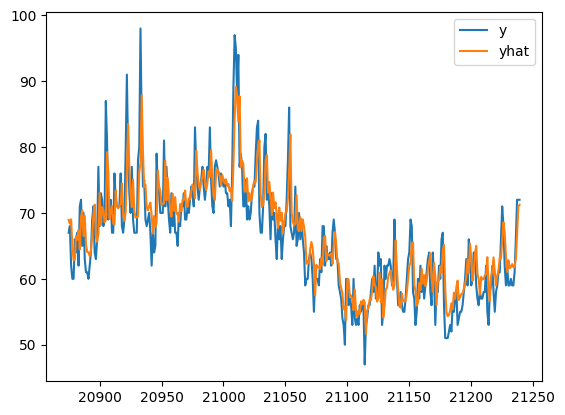

In [57]:
cv[["y", "yhat"]][-365:].plot()


# Predict next day with higher accuracy

In [58]:
m = fit_prophet(weather)
m.predict(weather.iloc[-1:])

00:07:46 - cmdstanpy - INFO - Chain [1] start processing
00:07:55 - cmdstanpy - INFO - Chain [1] done processing


ds      trend  yhat_lower  yhat_upper  trend_lower  trend_upper   
0 2023-04-22  66.321279   65.026691   77.055298    66.321279    66.321279  \

   additive_terms  additive_terms_lower  additive_terms_upper   
0        4.820439              4.820439              4.820439  \

   extra_regressors_additive  ...    weekly  weekly_lower  weekly_upper   
0                   4.769445  ...  0.091557      0.091557      0.091557  \

     yearly  yearly_lower  yearly_upper  multiplicative_terms   
0 -0.040564     -0.040564     -0.040564                   0.0  \

   multiplicative_terms_lower  multiplicative_terms_upper       yhat  
0                         0.0                         0.0  71.141718  

[1 rows x 40 columns]

# Predict for next year 

In [59]:
m = Prophet()
m.fit(weather)
future = m.make_future_dataframe(periods=365)
forecast = m.predict(future)

00:07:56 - cmdstanpy - INFO - Chain [1] start processing
00:08:05 - cmdstanpy - INFO - Chain [1] done processing


In [60]:
from prophet.plot import plot_plotly

plot_plotly(m, forecast)